<a href="https://colab.research.google.com/github/AlenaResiko/Project_curvature/blob/main/Estimate_curvature_load_and_sample_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [ ]:
import curvature
import manifold
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# distance matrices are loaded from drive

Mounted at /content/drive


# General methods for processing

In [ ]:
def sample_any_manifold(manifold_type, n_points, R, file_name, r=0):
  # Euclidean, sphere, Poincare disk, hyperboloid, torus
  if manifold_type == "Euclidean":
    X_Euclidean = manifold.Euclidean.sample(n_points, 3, R=R)
    np.save(file_name, X_Euclidean)
    return X_Euclidean
  if manifold_type == "Euclidean2d":
    X_Euclidean_2d = manifold.Euclidean.sample(n_points, 2, R=R)
    np.save(file_name, X_Euclidean_2d)
    return X_Euclidean_2d
  if manifold_type == "Sphere":
    X_Sphere = manifold.Sphere.sample(n_points, 3, R=R)
    np.save(file_name, X_Sphere)
    return X_Sphere
  if manifold_type == "Sphere2d":
    X_Sphere_2d = manifold.Sphere.sample(N=n_points, n=2, R=R)
    np.save(file_name, X_Sphere_2d)
    return X_Sphere_2d
  if manifold_type == "PoincareDisk":
    X_PoincareDisk = manifold.PoincareDisk.sample(n_points, Rh = R)
    np.save(file_name, X_PoincareDisk)
    return X_PoincareDisk
  if manifold_type == "Hyperboloid":
    X_Hyperboloid = manifold.Hyperboloid.sample(n_points, within_halfB=False)
    np.save(file_name, X_Hyperboloid)
    return X_Hyperboloid
  if manifold_type == "Torus":
    X_Torus = manifold.Torus.sample(n_points, r=r, R=R)[0]
    np.save(file_name, X_Torus)
    return X_Torus
  if manifold_type == "FlatTorus":
    X_FlatTorus = manifold.FlatTorus.sample(n_points, a=R)
    np.save(file_name, X_FlatTorus)
    return X_FlatTorus


In [ ]:
def display_any_manifold(manifold_type, X):
  %matplotlib inline
  fig = plt.figure()
  if manifold_type == "Euclidean":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 3)
  if manifold_type == "Euclidean2d":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], s = 3)
  if manifold_type == "Sphere":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 3)
  if manifold_type == "Sphere2d":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 3)
  if manifold_type == "PoincareDisk":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], s = 3)
  if manifold_type == "Hyperboloid":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 3)
  if manifold_type == "Torus":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 3)
  if manifold_type == "FlatTorus":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], s = 2)
  plt.show()

In [ ]:
def RGG_any_manifold(manifold_type, D, epsilon, X, n_points):
  G = nx.Graph() # note that G is an undirected graph
  e_weighted = []
  position_list = []
  for i in range(X.shape[0]):
    position_list.append((i, {"point_position": X[i]}))
  G.add_nodes_from(position_list)
  for i in range(n_points):
    for j in range(i, n_points):
      if D[i][j] <= epsilon and i<j:
        e_weighted.append((i, j, D[i][j])) #because G is not directed, only need to store i,j
  G.add_weighted_edges_from(e_weighted)
  return G

In [ ]:
def calculate_D_any_manifold(manifold_type, X):
  if manifold_type == "Euclidean":
    D = manifold.Euclidean.distance_array(X)
  if manifold_type == "Euclidean2d":
    D = manifold.Euclidean.distance_array(X)
  if manifold_type == "Sphere":
    D = manifold.Sphere.Rdist_array(3, X, R=2)
  if manifold_type == "Sphere2d":
    D = manifold.Sphere.Rdist_array(2, X, R=1)
  if manifold_type == "PoincareDisk":
    D = manifold.PoincareDisk.Rdist_array(X)
  if manifold_type == "Hyperboloid":
    D = manifold.Hyperboloid.distance_array(X) # uses Euclidean distance
  if manifold_type == "Torus":
    D = manifold.Torus.distance_array(X) # uses Euclidean distance
  if manifold_type == "FlatTorus":
    D = manifold.FlatTorus.distance_array(X, R)
  return D

# Loading and sampling manifolds - example

In [ ]:
# hyperparameters
R = 1
r = 1
n_points = int(10**(3.5))
epsilon = 1/n_points**(0.16) # changed 0.3 to 1/N^0.16
print(epsilon, n_points)

0.2754267398412311 3162


### 2d Euclidean ball

In [ ]:
# Sample for 2d Euclidean ball

# X_E_2d = sample_any_manifold(manifold_type="Euclidean2d", n_points=10000, R=1, file_name="E_2d.npy")
# display_any_manifold(manifold_type = "Euclidean2d", X = X_E_2d)
# D_Euclidean_2d = calculate_D_any_manifold(manifold_type="Euclidean2d", X=X_E_2d)
# np.save("D_E_2d.npy", D_Euclidean_2d)
# G_E_2d = RGG_any_manifold("Euclidean", D_Euclidean_2d, epsilon=0.3, X=X_E_2d, n_points=10000)
# pickle.dump(G_E_2d, open('G_E_2d.pickle', 'wb'))

In [ ]:
# Load for 2d Euclidean ball

X_E_2d = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/E_2d.npy")
print("X loaded")
display_any_manifold(manifold_type = "Euclidean2d", X = X_E_2d)
D_Euclidean_2d = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/D_E_2d.npy")
print("D loaded")
G_E_2d = pickle.load(open("/content/drive/MyDrive/Curvature Project/Calculated arrays/G_E_2d.pickle", 'rb'))
print("G loaded")

print("Number of edges: ", len(G_E_2d.edges()))
print(D_Euclidean_2d)
print(X_E_2d)
print(G_E_2d)

### 3d Euclidean ball

3162 1 0.2754267398412311


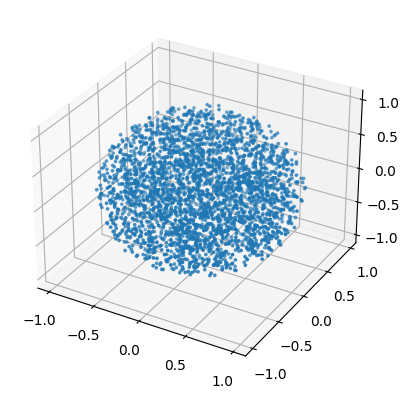

In [ ]:
# Sample for 3d Euclidean ball

# print(n_points, R, epsilon)
# X_E = sample_any_manifold(manifold_type="Euclidean", n_points=n_points, R=R, file_name="E.npy")
# display_any_manifold(manifold_type = "Euclidean", X = X_E)
# D_Euclidean = calculate_D_any_manifold(manifold_type="Euclidean", X=X_E)
# np.save("D_E.npy", D_Euclidean)
# G_E = RGG_any_manifold("Euclidean", D_Euclidean, epsilon, X=X_E, n_points=n_points)
# pickle.dump(G_E, open('G_E.pickle', 'wb'))

X loaded


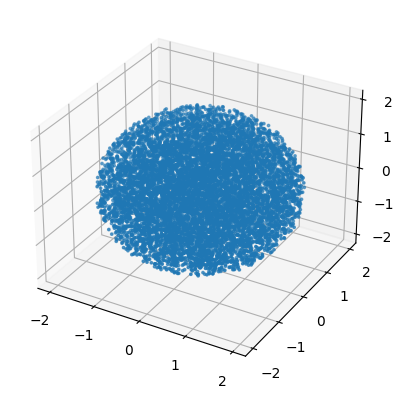

D loaded
G loaded
Number of edges:  154361
[[0.         1.57061836 2.78183075 ... 1.10704496 1.98879709 1.56804507]
 [1.57061836 0.         2.4782316  ... 2.40174262 2.70507006 1.87367931]
 [2.78183075 2.4782316  0.         ... 2.58304909 1.73543008 2.26084612]
 ...
 [1.10704496 2.40174262 2.58304909 ... 0.         1.42488206 1.9747972 ]
 [1.98879709 2.70507006 1.73543008 ... 1.42488206 0.         1.56225101]
 [1.56804507 1.87367931 2.26084612 ... 1.9747972  1.56225101 0.        ]]
[[-0.16277123 -1.48819432  0.30276799]
 [ 0.01287814 -0.69615612 -1.04209812]
 [-0.98700629  1.16817435  0.24869036]
 ...
 [-0.22908175 -1.05664566  1.3200768 ]
 [-1.37181225 -0.21024083  1.23032854]
 [-1.58783954 -0.98148945 -0.11099021]]
Graph with 10000 nodes and 154361 edges


In [ ]:
# load for 3d Euclidean ball

X_E = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/E.npy")
print("X loaded")
display_any_manifold(manifold_type = "Euclidean", X = X_E)
D_Euclidean = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/D_E.npy")
print("D loaded")
G_E = pickle.load(open("/content/drive/MyDrive/Curvature Project/Calculated arrays/G_E.pickle", 'rb'))
print("G loaded")

print("Number of edges: ", len(G_E.edges()))
print(D_Euclidean)
print(X_E)
print(G_E)

### 2d sphere

3162 0.2754267398412311 1


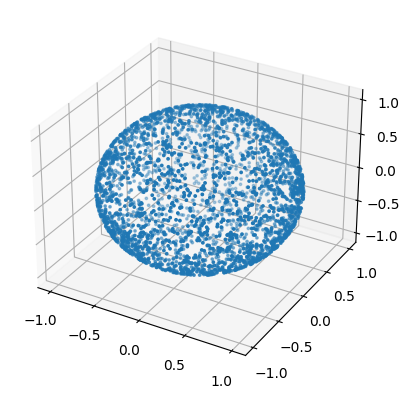

In [ ]:
# Sample graph for 2D Sphere

# print(n_points, epsilon, R)

# X_S_2d = sample_any_manifold(manifold_type="Sphere2d", n_points=n_points, R=1, file_name="S_2d.npy")
# display_any_manifold(manifold_type = "Sphere2d", X = X_S_2d)
# D_Sphere_2d = calculate_D_any_manifold(manifold_type="Sphere2d", X=X_S_2d)
# np.save("D_S_2d.npy", D_Sphere_2d)
# G_S_2d = RGG_any_manifold("Sphere2d", D_Sphere_2d, epsilon, X=X_S_2d, n_points=n_points)
# pickle.dump(G_S_2d, open('G_S_2d.pickle', 'wb'))

In [ ]:
print(G_S_2d)

Graph with 3162 nodes and 94299 edges


In [ ]:
# load graph for 2d sphere

X_S_2d = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/S_2d.npy")
print("X loaded")
display_any_manifold(manifold_type = "Sphere2d", X = X_S_2d)
D_Sphere_2d = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/D_S_2d.npy")
print("D loaded")
G_S_2d = pickle.load(open("/content/drive/MyDrive/Curvature Project/Calculated arrays/G_S_2d.pickle", 'rb'))
print("G loaded")


print("Number of edges: ", len(G_S_2d.edges()))
print(D_Sphere_2d)
print(X_S_2d)
print(G_S_2d)

G loaded


### 3d sphere

In [ ]:
# Sample graph for 3d Sphere


# X_S = sample_any_manifold(manifold_type="Sphere", n_points=n_points, R=R, file_name="S.npy")
# display_any_manifold(manifold_type = "Sphere", X = X_S)
# D_Sphere = calculate_D_any_manifold(manifold_type="Sphere", X=X_S)
# np.save("D_S.npy", D_Sphere)
# G_S = RGG_any_manifold("Sphere", D_Sphere, epsilon, X=X_S, n_points=n_points)
# pickle.dump(G_S, open('G_S.pickle', 'wb'))

X loaded


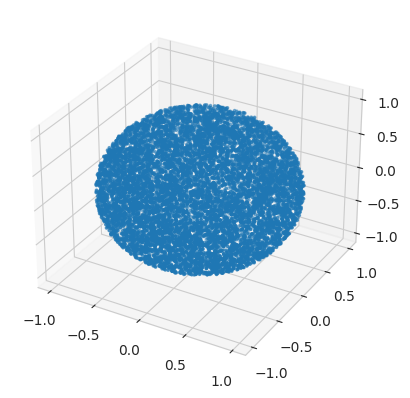

KeyboardInterrupt: ignored

In [ ]:
# load graph for 3d sphere

# X_S = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/S.npy")
# print("X loaded")
# display_any_manifold(manifold_type = "Sphere", X = X_S)
# D_Sphere = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/D_S.npy")
# print("D loaded")
# G_S = pickle.load(open("/content/drive/MyDrive/Curvature Project/Calculated arrays/G_S.pickle", 'rb'))
# print("G loaded")


# print("Number of edges: ", len(G_S.edges()))
# print(D_Sphere)
# print(X_S)
# print(G_S)

### Poincare disk

10000 0.2290867652767773 1


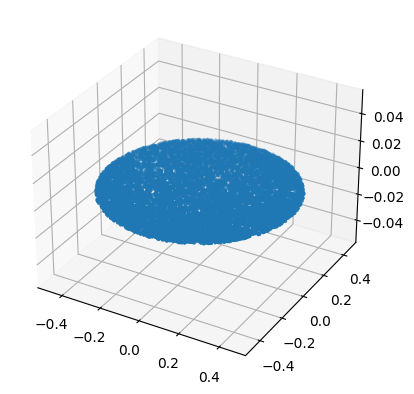

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
[[0.         1.07346222 1.2341758  ... 1.6909365  1.21734802 1.54532823]
 [1.07346222 0.         0.41460042 ... 0.62488281 0.38177256 1.01654571]
 [1.2341758  0.41460042 0.         ... 0.62699677 0.03291857 0.62169823]
 ...
 [1.6909365  0.62488281 0.62699677 ... 0.         0.61340029 1.16586657]
 [1.21734802 0.38177256 0.03291857 ... 0.61340029 0.         0.65279186]
 [1.54532823 1.01654571 0.62169823 ... 1.16586657 0.65279186 0.        ]]
Graph with 10000 nodes and 2193145 edges


In [ ]:
# Sample graph for Poincare Disk

# R=1
# n_points = 10**4
# epsilon = 1/n_points**(0.16)
# print(n_points, epsilon, R)

# X_P = sample_any_manifold(manifold_type="PoincareDisk", n_points=n_points, R=R, file_name="P.npy")
# display_any_manifold(manifold_type = "PoincareDisk", X = X_P)
# D_PoincareDisk = calculate_D_any_manifold(manifold_type="PoincareDisk", X=X_P)
# np.save("D_P.npy", D_PoincareDisk)
# G_P = RGG_any_manifold("PoincareDisk", D_PoincareDisk, epsilon, X=X_P, n_points=n_points)
# pickle.dump(G_P, open('G_P.pickle', 'wb'))
# print(D_PoincareDisk)
# print(G_P)

X loaded


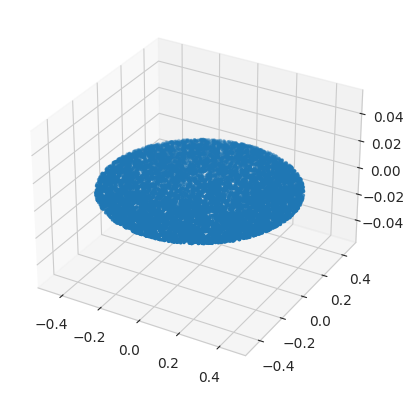

D loaded
G calculated
Number of edges:  3635688
[[0.         1.59740929 1.41281163 ... 1.74369076 0.73445491 0.73668071]
 [1.59740929 0.         0.92169619 ... 0.93984994 1.19945817 1.02260114]
 [1.41281163 0.92169619 0.         ... 1.67224587 0.73220997 0.67620253]
 ...
 [1.74369076 0.93984994 1.67224587 ... 0.         1.6393431  1.44898706]
 [0.73445491 1.19945817 0.73220997 ... 1.6393431  0.         0.19159993]
 [0.73668071 1.02260114 0.67620253 ... 1.44898706 0.19159993 0.        ]]
[[ 0.14264991 -0.4367052 ]
 [-0.05478067  0.28932114]
 [ 0.34632851  0.15899997]
 ...
 [-0.42905436  0.10320844]
 [ 0.29611782 -0.16283683]
 [ 0.21889399 -0.12185994]]
Graph with 10000 nodes and 3635688 edges


In [ ]:
# load graph for Poincare disk

X_P = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/P.npy")
print("X loaded")
display_any_manifold(manifold_type = "PoincareDisk", X = X_P)
D_PoincareDisk = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/D_P.npy")
print("D loaded")
G_P = RGG_any_manifold("PoincareDisk", D_PoincareDisk, epsilon=epsilon, X=X_P, n_points=n_points)
print("G calculated")

print("Number of edges: ", len(G_P.edges()))
print(D_PoincareDisk)
print(X_P)
print(G_P)

### Hyperboloid

3162 0.2754267398412311 1
False
a =  2
c =  1
B =  2


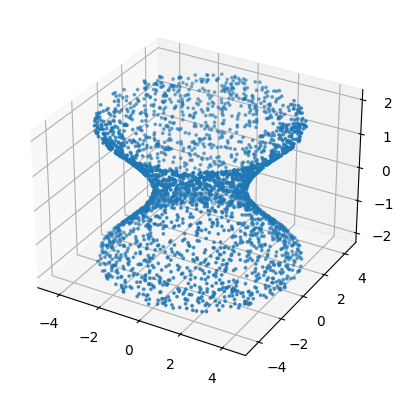

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


NameError: ignored

In [ ]:
# Sample graph for Hyperboloid

print(n_points, epsilon, R)

X_H = sample_any_manifold(manifold_type="Hyperboloid", n_points=n_points, R=R, file_name="H.npy")
display_any_manifold(manifold_type = "Hyperboloid", X = X_H)
D_Hyperboloid = calculate_D_any_manifold(manifold_type="Hyperboloid", X=X_H)
np.save("D_H.npy", D_Hyperboloid)
G_H = RGG_any_manifold("Hyperboloid", D_Hyperboloid, epsilon, X=X_H, n_points=n_points)
pickle.dump(G_H, open('G_H.pickle', 'wb'))

In [ ]:
print(D_Hyperboloid)

[[0.         5.27878306 0.23890888 ... 5.13364039 2.27604475 1.32174687]
 [5.27878306 0.         5.07815931 ... 0.4427809  5.176718   5.23483059]
 [0.23890888 5.07815931 0.         ... 4.94066978 2.11163555 1.20108147]
 ...
 [5.13364039 0.4427809  4.94066978 ... 0.         5.19446599 5.10828229]
 [2.27604475 5.176718   2.11163555 ... 5.19446599 0.         1.70582383]
 [1.32174687 5.23483059 1.20108147 ... 5.10828229 1.70582383 0.        ]]


In [ ]:
# load for Hyperboloid

X_H = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/H.npy")
print("X loaded")
display_any_manifold(manifold_type = "Hyperboloid", X = X_H)
D_Hyperboloid = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/D_H.npy")
print("D loaded")
G_H = pickle.load(open("/content/drive/MyDrive/Curvature Project/Calculated arrays/G_H.pickle", 'rb'))
print("G loaded")

print("Number of edges: ", len(G_H.edges()))
print(D_Hyperboloid)
print(X_H)
print(G_H)

### Torus

3162 0.2754267398412311 2


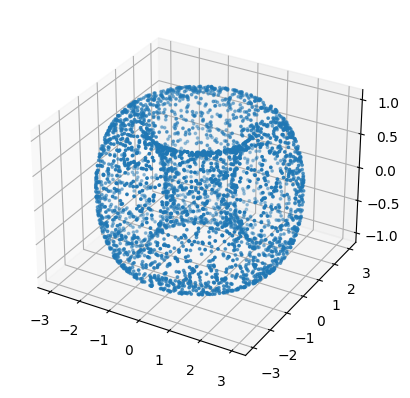

In [ ]:
# Sample graph for Torus

# R = 2
# r = 1
# print(n_points, epsilon, R)

# X_T = sample_any_manifold(manifold_type="Torus", n_points=n_points, r=r, R=R, file_name="T.npy")
# display_any_manifold(manifold_type = "Torus", X = X_T)
# D_Torus = calculate_D_any_manifold(manifold_type="Torus", X=X_T)
# np.save("D_T.npy", D_Torus)
# G_T = RGG_any_manifold("Torus", D_Torus, epsilon, X=X_T, n_points=n_points)
# pickle.dump(G_T, open('G_T.pickle', 'wb'))

In [ ]:
print(G_T)

Graph with 3162 nodes and 15212 edges


In [ ]:
print(D_Torus)

[[0.         1.40283619 5.21734189 ... 2.46566693 1.75287799 5.18104413]
 [1.40283619 0.         5.57492624 ... 3.42739684 0.69804853 5.49200837]
 [5.21734189 5.57492624 0.         ... 3.78224035 5.10858984 3.15944144]
 ...
 [2.46566693 3.42739684 3.78224035 ... 0.         3.28232145 5.02033273]
 [1.75287799 0.69804853 5.10858984 ... 3.28232145 0.         5.26757507]
 [5.18104413 5.49200837 3.15944144 ... 5.02033273 5.26757507 0.        ]]


X loaded


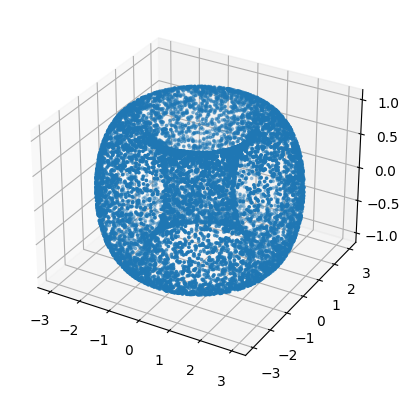

D loaded
G calculated
Number of edges:  179483
[[0.         3.88608979 5.40120165 ... 5.8741956  1.28947112 4.38156024]
 [3.88608979 0.         3.46978605 ... 3.14004102 4.56698884 3.54333708]
 [5.40120165 3.46978605 0.         ... 1.18595575 5.2141547  2.63331601]
 ...
 [5.8741956  3.14004102 1.18595575 ... 0.         5.89601111 2.91552919]
 [1.28947112 4.56698884 5.2141547  ... 5.89601111 0.         4.10215355]
 [4.38156024 3.54333708 2.63331601 ... 2.91552919 4.10215355 0.        ]]
[[-0.09234865  2.98609087  0.1575029 ]
 [ 2.27584799  0.01162938  0.96119275]
 [ 0.48797826 -2.26900292 -0.94711891]
 ...
 [ 1.2142908  -2.73357674 -0.13278955]
 [-1.1814644   2.64483654 -0.44258721]
 [-1.04555622 -1.22199156  0.92006947]]
Graph with 10000 nodes and 179483 edges


In [ ]:
# load graph for Torus

X_T = np.load("/content/drive/MyDrive/Curvature Project/T.npy")
print("X loaded")
display_any_manifold(manifold_type = "Torus", X = X_T)
D_Torus = np.load("/content/drive/MyDrive/Curvature Project/D_T.npy")
print("D loaded")
G_T = RGG_any_manifold("Torus", D_Torus, epsilon=epsilon, X=X_T, n_points=n_points)
print("G calculated")

print("Number of edges: ", len(G_T.edges()))
print(D_Torus)
print(X_T)
print(G_T)

### Flat torus

In [ ]:
# Sample graph for Flat Torus

print(n_points, R)

X_FT = sample_any_manifold(manifold_type="FlatTorus", n_points=n_points, R=R, file_name="FT.npy")
display_any_manifold(manifold_type = "FlatTorus", X = X_FT)
D_FlatTorus = calculate_D_any_manifold(manifold_type="FlatTorus", X=X_FT)
G_FT = RGG_any_manifold("FlatTorus", D_FlatTorus, epsilon, X=X_FT, n_points=n_points)
np.save("D_FT.npy", D_FlatTorus)
pickle.dump(G_FT, open('G_FT.pickle', 'wb'))

<Figure size 640x480 with 0 Axes>

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


In [ ]:
print(D_FlatTorus)
print(G_FT)

[[0.         0.90920837 0.53213667 ... 0.83910204 0.84532879 0.4508727 ]
 [0.90920837 0.         1.11353564 ... 0.31234243 0.93990725 0.47022748]
 [0.53213667 1.11353564 0.         ... 0.93287303 0.44890288 0.81599746]
 ...
 [0.83910204 0.31234243 0.93287303 ... 0.         0.77425078 0.49870299]
 [0.84532879 0.93990725 0.44890288 ... 0.77425078 0.         0.91704424]
 [0.4508727  0.47022748 0.81599746 ... 0.49870299 0.91704424 0.        ]]
Graph with 10000 nodes and 3534802 edges


In [ ]:
# load for Flat Torus

X_FT = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/FT.npy")
print("X loaded")
display_any_manifold(manifold_type = "FlatTorus", X = X_FT)
D_FlatTorus = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/D_FT.npy")
print("D loaded")
G_FT = RGG_any_manifold("FlatTorus", D_FlatTorus, epsilon=epsilon, X=X_FT, n_points=n_points)
print("G calculated")

print("Number of edges: ", len(G_FT.edges()))
print(D_FlatTorus)
print(X_FT)
print(G_FT)

X loaded


<Figure size 640x480 with 0 Axes>

D loaded


# Calculate ORC

In [ ]:
!pip install GraphRicciCurvature
!pip install scikit-learn

import importlib

# matplotlib setting
%matplotlib inline

from GraphRicciCurvature.OllivierRicci import OllivierRicci

from sklearn import preprocessing, metrics

import GraphRicciCurvature
print(GraphRicciCurvature.__version__)

In [ ]:
import statistics
def calculate_ORC_any_manifold(G_for_orc):
  orc = OllivierRicci(G_for_orc, alpha=0, verbose="TRACE")
  orc.compute_ricci_curvature()
  G_orc = orc.G.copy()
  #show_results
  # Print the first thirty results
  print("G, first 100 edges: ")
  for n1,n2 in list(G_orc.edges())[:100]:
      print("Ollivier-Ricci curvature of edge (%s,%s) is %f" % (n1 ,n2, G_orc[n1][n2]["ricciCurvature"]))

  # Plot the histogram of Ricci curvatures
  plt.subplot(2, 1, 1)
  ricci_curvatures = nx.get_edge_attributes(G_orc, "ricciCurvature").values()
  plt.hist(ricci_curvatures,bins=30)
  plt.xlabel('Ricci curvature')
  plt.title("Histogram of Ricci Curvatures")

  # Plot the histogram of edge weights
  plt.subplot(2, 1, 2)
  weights = nx.get_edge_attributes(G_orc, "weight").values()
  plt.hist(weights,bins=20)
  plt.xlabel('Edge weight')
  plt.title("Histogram of Edge weights")

  plt.tight_layout()

  return G_orc

In [ ]:
def calculate_ORSC_any_manifold(G_orc, d, epsilon):

  dict_orsc = {}
  list_nodes = list(G_orc.nodes())
  for n1 in list_nodes:
    n_neighbours = len(list(nx.edges(G_orc, n1))) # number nodes adjacent to n1 (checked)
    sum = 0 # sum of adjacent edges's ORC
    for i in range(n_neighbours):
      n2 = list(nx.edges(G_orc, n1))[i][1] # checked
      sum += G_orc[n1][n2]["ricciCurvature"]
    if n_neighbours != 0:
      dict_orsc[n1] = (sum / n_neighbours) * (2*(d+2)/(epsilon**2))
    else:
      print("node of 0 degree")
      dict_orsc[n1] = 0

  nx.set_node_attributes(G_orc, dict_orsc, name = "oliverDiscreteRicciCurvature")
  # Print the first 30 results
  print("ORSC, first 30 nodes: ")
  orsc_nodes = nx.get_node_attributes(G_orc, "oliverDiscreteRicciCurvature")
  i = 0
  for n1 in list(G_orc.nodes())[:45]:
    print("Discrete Ollivier-Ricci curvature of node %s is %f" % (n1, orsc_nodes[i]))
    i += 1

  # Plot the histogram of Ricci curvatures
  plt.subplot(2, 1, 1)
  # discrete_ricci_curvtures = nx.get_node_attributes(G_orc, "oliverDiscreteRicciCurvature").values()
  plt.hist(orsc_nodes.values(),bins=25)
  plt.xlabel('ORSC curvature')
  plt.title("Histogram of Scalar Ricci Curvatures")
  plt.tight_layout()


  plt.tight_layout()

  orsc_arr = dict_orsc.values()
  mean = statistics.mean(orsc_arr)
  print("Mean discrete Ricci Curvature over nodes is ", mean)
  std = statistics.stdev(orsc_arr)
  print("Standard deviation ", std)

  return G_orc

In [ ]:
H_orc = calculate_ORC_any_manifold(G_H)

In [ ]:
H_orsc = calculate_ORSC_any_manifold(H_orc, d=3, epsilon=0.3)

TRACE:GraphRicciCurvature:Number of nodes: 10000
TRACE:GraphRicciCurvature:Number of edges: 154361
TRACE:GraphRicciCurvature:Start to compute all pair shortest path.
TRACE:GraphRicciCurvature:60.980928 secs for all pair by NetworKit.
INFO:GraphRicciCurvature:126.331198 secs for Ricci curvature computation.


G, first 100 edges: 
Ollivier-Ricci curvature of edge (0,284) is -0.277872
Ollivier-Ricci curvature of edge (0,646) is -0.171338
Ollivier-Ricci curvature of edge (0,695) is -0.082585
Ollivier-Ricci curvature of edge (0,1267) is -0.330872
Ollivier-Ricci curvature of edge (0,1632) is -0.464754
Ollivier-Ricci curvature of edge (0,2370) is -0.028639
Ollivier-Ricci curvature of edge (0,2693) is -0.101174
Ollivier-Ricci curvature of edge (0,2902) is -0.000445
Ollivier-Ricci curvature of edge (0,2990) is -0.315371
Ollivier-Ricci curvature of edge (0,3325) is -0.576586
Ollivier-Ricci curvature of edge (0,3397) is -0.305161
Ollivier-Ricci curvature of edge (0,3775) is -0.112160
Ollivier-Ricci curvature of edge (0,4032) is -0.004966
Ollivier-Ricci curvature of edge (0,4350) is -0.093164
Ollivier-Ricci curvature of edge (0,4667) is -0.171095
Ollivier-Ricci curvature of edge (0,6953) is -0.073875
Ollivier-Ricci curvature of edge (0,7293) is -0.229271
Ollivier-Ricci curvature of edge (0,7358) is -0

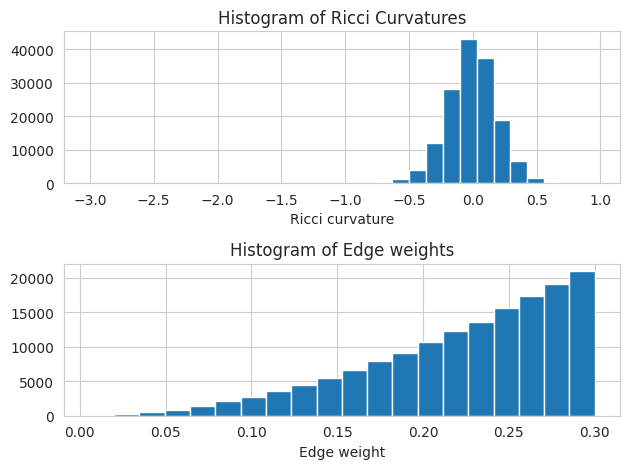

In [ ]:
E_orc = calculate_ORC_any_manifold(G_E)

In [ ]:
 # pickle.dump(E_orc, open('E_orc.pickle', 'wb')) # RGGs with Ricci curvature attributes on the edges

In [ ]:
list(nx.edges(E_orc, 0))

NameError: ignored

ORSC, first 30 nodes: 
Discrete Ollivier-Ricci curvature of node 0 is -22.218603
Discrete Ollivier-Ricci curvature of node 1 is -12.428535
Discrete Ollivier-Ricci curvature of node 2 is -0.132912
Discrete Ollivier-Ricci curvature of node 3 is -8.904238
Discrete Ollivier-Ricci curvature of node 4 is -12.149142
Discrete Ollivier-Ricci curvature of node 5 is 6.245725
Discrete Ollivier-Ricci curvature of node 6 is 8.565033
Discrete Ollivier-Ricci curvature of node 7 is -13.861800
Discrete Ollivier-Ricci curvature of node 8 is 2.690451
Discrete Ollivier-Ricci curvature of node 9 is 0.102915
Discrete Ollivier-Ricci curvature of node 10 is 2.708974
Discrete Ollivier-Ricci curvature of node 11 is -9.680347
Discrete Ollivier-Ricci curvature of node 12 is 6.592403
Discrete Ollivier-Ricci curvature of node 13 is 26.282465
Discrete Ollivier-Ricci curvature of node 14 is -10.155110
Discrete Ollivier-Ricci curvature of node 15 is 4.075543
Discrete Ollivier-Ricci curvature of node 16 is -10.111250
Di

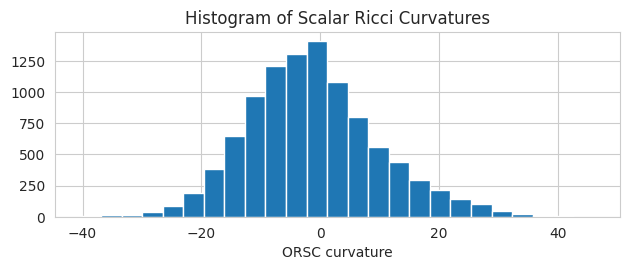

In [ ]:
E_orsc = calculate_ORSC_any_manifold(E_orc, d=3, epsilon=0.3)

-1.216484294283096
11.100989346448928


In [ ]:
nx.get_node_attributes(E_orsc, "oliverDiscreteRicciCurvature")

{0: -11.093820203680588,
 1: -6.181728751151822,
 2: 0.03460644369363409,
 3: -4.270026681822599,
 4: -6.0483318265057875,
 5: 3.319062512537043,
 6: 4.686163907019363,
 7: -6.910966936977019,
 8: 1.4309533416813531,
 9: 0.4938370480571517,
 10: 1.495681859610574,
 11: -4.826960019108981,
 12: 3.3403517201252475,
 13: 13.7770417862656,
 14: -5.057598015363259,
 15: 2.462073411462503,
 16: -4.9806270172141645,
 17: 5.663731312632546,
 18: 14.458816108976816,
 19: 5.221555777793387,
 20: 3.0724825461273273,
 21: 10.856570950577897,
 22: -4.975981117615607,
 23: 0.5957679264328928,
 24: 4.638964454977608,
 25: -0.10942569656494003,
 26: -9.359739179750136,
 27: -6.706709425850612,
 28: -3.453215692774046,
 29: -4.705228710829912,
 30: 12.257895639645017,
 31: 8.041685939069447,
 32: -7.289636867905528,
 33: 4.846850044384696,
 34: -3.5317276556089663,
 35: -6.8916359448421565,
 36: -0.17315340359802706,
 37: -1.9649166821737178,
 38: -9.01102607325154,
 39: -0.2460450399738306,
 40: -0.90

In [ ]:
# pickle.dump(E_orsc, open('E_orsc.pickle', 'wb')) # RGGs with Ricci curvature edge attributes on the edges and Discrete Ricci node attributes

In [ ]:
E_orsc_loaded = pickle.load(open("/content/drive/MyDrive/Curvature Project/Calculated arrays/E_orsc.pickle", 'rb'))

In [ ]:
nx.get_node_attributes(E_orsc_loaded, "oliverDiscreteRicciCurvature")

{0: -11.093820203680588,
 1: -6.181728751151822,
 2: 0.03460644369363409,
 3: -4.270026681822599,
 4: -6.0483318265057875,
 5: 3.319062512537043,
 6: 4.686163907019363,
 7: -6.910966936977019,
 8: 1.4309533416813531,
 9: 0.4938370480571517,
 10: 1.495681859610574,
 11: -4.826960019108981,
 12: 3.3403517201252475,
 13: 13.7770417862656,
 14: -5.057598015363259,
 15: 2.462073411462503,
 16: -4.9806270172141645,
 17: 5.663731312632546,
 18: 14.458816108976816,
 19: 5.221555777793387,
 20: 3.0724825461273273,
 21: 10.856570950577897,
 22: -4.975981117615607,
 23: 0.5957679264328928,
 24: 4.638964454977608,
 25: -0.10942569656494003,
 26: -9.359739179750136,
 27: -6.706709425850612,
 28: -3.453215692774046,
 29: -4.705228710829912,
 30: 12.257895639645017,
 31: 8.041685939069447,
 32: -7.289636867905528,
 33: 4.846850044384696,
 34: -3.5317276556089663,
 35: -6.8916359448421565,
 36: -0.17315340359802706,
 37: -1.9649166821737178,
 38: -9.01102607325154,
 39: -0.2460450399738306,
 40: -0.90

In [ ]:
S_orc = calculate_ORC_any_manifold(G_S)

In [ ]:
S_orsc = calculate_ORSC_any_manifold(S_orc, d=3, epsilon=0.3)

In [ ]:
nx.get_node_attributes(S_orc, "oliverDiscreteRicciCurvature")

In [ ]:
nx.get_node_attributes(S_orc, "oliverDiscreteRicciCurvature").values()

In [ ]:
T_orc = calculate_ORC_any_manifold(G_T)

In [ ]:
T_orsc = calculate_ORSC_any_manifold(T_orc)

TRACE:GraphRicciCurvature:Number of nodes: 10000
TRACE:GraphRicciCurvature:Number of edges: 279725
TRACE:GraphRicciCurvature:Start to compute all pair shortest path.
TRACE:GraphRicciCurvature:95.437547 secs for all pair by NetworKit.
INFO:GraphRicciCurvature:333.955699 secs for Ricci curvature computation.


G, first 100 edges: 
Ollivier-Ricci curvature of edge (0,10) is -0.027188
Ollivier-Ricci curvature of edge (0,157) is 0.137459
Ollivier-Ricci curvature of edge (0,194) is 0.405247
Ollivier-Ricci curvature of edge (0,541) is 0.384293
Ollivier-Ricci curvature of edge (0,1044) is 0.376413
Ollivier-Ricci curvature of edge (0,1335) is 0.322884
Ollivier-Ricci curvature of edge (0,1348) is -0.729086
Ollivier-Ricci curvature of edge (0,1576) is 0.231424
Ollivier-Ricci curvature of edge (0,2014) is -4.612330
Ollivier-Ricci curvature of edge (0,2042) is 0.313943
Ollivier-Ricci curvature of edge (0,2104) is -0.886965
Ollivier-Ricci curvature of edge (0,2183) is 0.368717
Ollivier-Ricci curvature of edge (0,2217) is 0.337732
Ollivier-Ricci curvature of edge (0,2221) is 0.251771
Ollivier-Ricci curvature of edge (0,2466) is -0.265378
Ollivier-Ricci curvature of edge (0,2476) is 0.347369
Ollivier-Ricci curvature of edge (0,2483) is -0.123658
Ollivier-Ricci curvature of edge (0,2533) is 0.230362
Ollivi

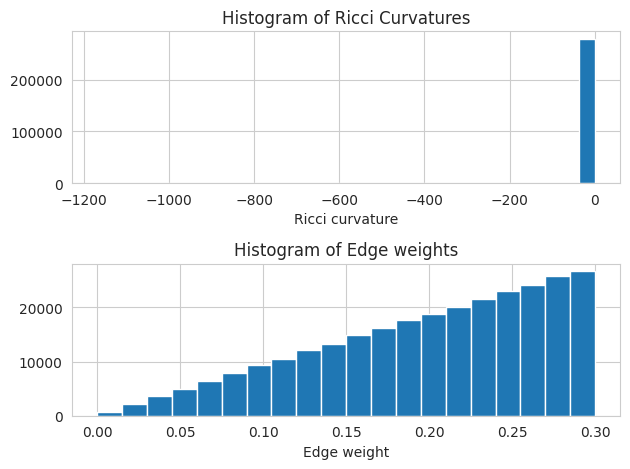

In [ ]:
S_2d_orc = calculate_ORC_any_manifold(G_S_2d)

ORSC, first 30 nodes: 
Discrete Ollivier-Ricci curvature of node 0 is -66.113518
Discrete Ollivier-Ricci curvature of node 1 is -5.301281
Discrete Ollivier-Ricci curvature of node 2 is -7.833132
Discrete Ollivier-Ricci curvature of node 3 is -37.667234
Discrete Ollivier-Ricci curvature of node 4 is 4.538265
Discrete Ollivier-Ricci curvature of node 5 is -32.054771
Discrete Ollivier-Ricci curvature of node 6 is -14.581668
Discrete Ollivier-Ricci curvature of node 7 is 7.032102
Discrete Ollivier-Ricci curvature of node 8 is 2.361871
Discrete Ollivier-Ricci curvature of node 9 is -20.356322
Discrete Ollivier-Ricci curvature of node 10 is 8.734786
Discrete Ollivier-Ricci curvature of node 11 is 9.264040
Discrete Ollivier-Ricci curvature of node 12 is -10.911592
Discrete Ollivier-Ricci curvature of node 13 is -20.991419
Discrete Ollivier-Ricci curvature of node 14 is 0.725509
Discrete Ollivier-Ricci curvature of node 15 is -21.732271
Discrete Ollivier-Ricci curvature of node 16 is -15.48877

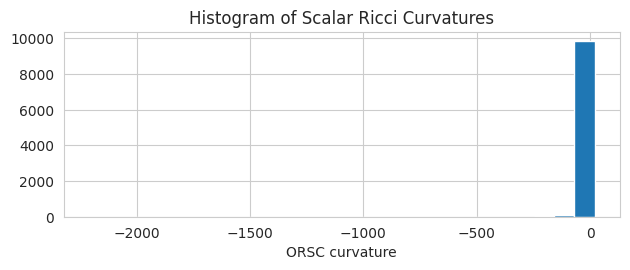

In [ ]:
S_2d_orsc = calculate_ORSC_any_manifold(S_2d_orc, d=2, epsilon=0.3)

In [ ]:
pickle.dump(S_2d_orsc, open('S_2d_orsc.pickle', 'wb')) # RGGs with Ricci curvature edge attributes on the edges and Discrete Ricci node attributes

TRACE:GraphRicciCurvature:Number of nodes: 10000
TRACE:GraphRicciCurvature:Number of edges: 1116198
TRACE:GraphRicciCurvature:Start to compute all pair shortest path.
TRACE:GraphRicciCurvature:190.928229 secs for all pair by NetworKit.
INFO:GraphRicciCurvature:10166.014314 secs for Ricci curvature computation.


G, first 100 edges: 
Ollivier-Ricci curvature of edge (0,18) is -0.017189
Ollivier-Ricci curvature of edge (0,76) is 0.001505
Ollivier-Ricci curvature of edge (0,79) is -0.007585
Ollivier-Ricci curvature of edge (0,103) is -0.012091
Ollivier-Ricci curvature of edge (0,145) is -0.046712
Ollivier-Ricci curvature of edge (0,244) is 0.015202
Ollivier-Ricci curvature of edge (0,253) is -0.014887
Ollivier-Ricci curvature of edge (0,345) is 0.002824
Ollivier-Ricci curvature of edge (0,451) is 0.020547
Ollivier-Ricci curvature of edge (0,540) is -0.015737
Ollivier-Ricci curvature of edge (0,687) is -0.005006
Ollivier-Ricci curvature of edge (0,697) is -0.023422
Ollivier-Ricci curvature of edge (0,729) is -0.003331
Ollivier-Ricci curvature of edge (0,732) is -0.002805
Ollivier-Ricci curvature of edge (0,813) is -0.018370
Ollivier-Ricci curvature of edge (0,825) is 0.010653
Ollivier-Ricci curvature of edge (0,889) is -0.013185
Ollivier-Ricci curvature of edge (0,899) is 0.024287
Ollivier-Ricci c

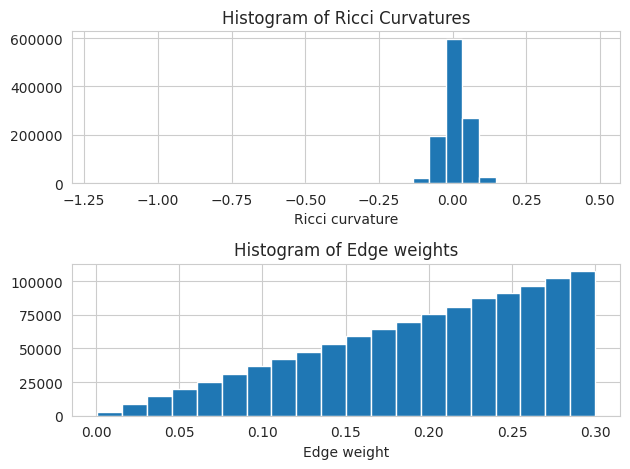

In [ ]:
S_2d_orc = calculate_ORC_any_manifold(G_S_2d)

In [ ]:
S_2d_orsc = calculate_ORSC_any_manifold(S_2d_orc, d=2, epsilon=0.3)

NameError: ignored

In [ ]:
P_orc = calculate_ORC_any_manifold(G_P)

TRACE:GraphRicciCurvature:Number of nodes: 10000
TRACE:GraphRicciCurvature:Number of edges: 3635688
TRACE:GraphRicciCurvature:Start to compute all pair shortest path.
TRACE:GraphRicciCurvature:435.817828 secs for all pair by NetworKit.


In [ ]:
P_orsc = calculate_ORSC_any_manifold(P_orc)